In [250]:
#!/usr/bin/env python
# coding: utf-8

# # Perf. vs. Configuration High Dim Visualization

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import sys

# You will have to register for an account for plotly, which is free for 25 plots / month.
# After you registered a username, it will then generate an api_key for you.
# Then run plotly.tools.set_credentials_file(username='$USERNAME', api_key=$API_KEY)

import plotly as py
import plotly.graph_objs as go
import pandas as pd

In [251]:
#fbgemm_results_1_32_16_12_14_4_3_3_1_1_0_0_0_0.log
#fbgemm_results_1_32_32_14_14_1_3_3_1_1_0_0_0_0.log
#fbgemm_results_1_32_32_14_14_1_3_3_1_1_1_1_1_1.log
#fbgemm_results_1_3_64_224_224_1_7_7_2_2_3_3_3_3.log
#fbgemm_results_1_544_544_14_14_1_3_3_2_2_1_1_1_1.log
#fbgemm_results_1_8_8_4_4_1_3_3_1_1_1_1_0_0.log
#fbgemm_results_2_32_16_16_14_4_3_3_1_1_0_0_0_0.log
#fbgemm_results_2_32_32_14_14_1_3_3_1_1_0_0_0_0.log
#fbgemm_results_2_32_32_28_14_1_3_3_1_1_1_1_0_0.log

good_filepaths = [
    
    "fbgemm_final_results_1_32_16_12_14_4_3_3_1_1_0_0_0_0.log",
    "fbgemm_final_results_1_32_32_14_14_1_3_3_1_1_0_0_0_0.log",
    "fbgemm_final_results_1_32_32_14_14_1_3_3_1_1_1_1_1_1.log",
    "fbgemm_final_results_1_3_64_224_224_1_7_7_2_2_3_3_3_3.log",
    "fbgemm_final_results_1_544_544_14_14_1_3_3_2_2_1_1_1_1.log",
    "fbgemm_final_results_1_8_8_4_4_1_3_3_1_1_1_1_0_0.log",
    "fbgemm_final_results_2_32_16_16_14_4_3_3_1_1_0_0_0_0.log",
    "fbgemm_final_results_2_32_32_14_14_1_3_3_1_1_0_0_0_0.log",
    "fbgemm_final_results_2_32_32_28_14_1_3_3_1_1_1_1_0_0.log"
]

add_filepaths = [
    
    "fbgemm_add_results_1_32_16_12_14_4_3_3_1_1_0_0_0_0.log",
    "fbgemm_add_results_1_32_32_14_14_1_3_3_1_1_0_0_0_0.log",
    "fbgemm_add_results_1_32_32_14_14_1_3_3_1_1_1_1_1_1.log",
    "fbgemm_add_results_1_3_64_224_224_1_7_7_2_2_3_3_3_3.log",
    "fbgemm_add_results_1_544_544_14_14_1_3_3_2_2_1_1_1_1.log",
    "fbgemm_add_results_1_8_8_4_4_1_3_3_1_1_1_1_0_0.log",
    "fbgemm_add_results_2_32_16_16_14_4_3_3_1_1_0_0_0_0.log",
    "fbgemm_add_results_2_32_32_14_14_1_3_3_1_1_0_0_0_0.log",
    "fbgemm_add_results_2_32_32_28_14_1_3_3_1_1_1_1_0_0.log"
]

default_filepaths = [
    
 "fbgemm_default_results_1_1024_1024_14_14_32_3_3_2_2_1_1_1_1.log",
 "fbgemm_default_results_1_1024_1024_7_7_32_3_3_1_1_1_1_1_1.log",
 "fbgemm_default_results_1_256_256_56_56_32_3_3_2_2_1_1_1_1.log",
 "fbgemm_default_results_1_32_16_12_14_4_3_3_1_1_0_0_0_0.log",
 "fbgemm_default_results_1_32_32_14_14_1_3_3_1_1_0_0_0_0.log",
 "fbgemm_default_results_1_32_32_14_14_1_3_3_1_1_1_1_1_1.log",
 "fbgemm_default_results_1_3_64_224_224_1_7_7_2_2_3_3_3_3.log",
 "fbgemm_default_results_1_512_512_28_28_32_3_3_2_2_1_1_1_1.log",
 "fbgemm_default_results_1_544_544_14_14_1_3_3_2_2_1_1_1_1.log",
 "fbgemm_default_results_1_8_8_4_4_1_3_3_1_1_1_1_0_0.log",
 "fbgemm_default_results_2_32_16_16_14_4_3_3_1_1_0_0_0_0.log",
 "fbgemm_default_results_2_32_32_14_14_1_3_3_1_1_0_0_0_0.log",
 "fbgemm_default_results_2_32_32_28_14_1_3_3_1_1_1_1_0_0.log",
 "fbgemm_default_results_50_1024_1024_14_14_32_3_3_2_2_1_1_1_1.log",
 "fbgemm_default_results_50_1024_1024_7_7_32_3_3_1_1_1_1_1_1.log",
 #"fbgemm_default_results_50_256_256_56_56_32_3_3_2_2_1_1_1_1.log",
 "fbgemm_default_results_50_3_64_224_224_1_7_7_2_2_3_3_3_3.log",
 "fbgemm_default_results_50_512_512_28_28_32_3_3_2_2_1_1_1_1.log"
]

excel_filepaths = [
 "fbgemm_correct_excel_results_1_1024_2048_14_14_1_1_1_2_2_0_0_0_0.log",
 "fbgemm_correct_excel_results_1_1024_256_14_14_1_1_1_1_1_0_0_0_0.log",
 "fbgemm_correct_excel_results_1_1024_512_14_14_1_1_1_1_1_0_0_0_0.log",
 "fbgemm_correct_excel_results_1_128_128_28_28_1_3_3_1_1_1_1_1_1.log",
 "fbgemm_correct_excel_results_1_128_128_56_56_1_3_3_2_2_1_1_1_1.log",
 "fbgemm_correct_excel_results_1_128_512_28_28_1_1_1_1_1_0_0_0_0.log",
 "fbgemm_correct_excel_results_1_2048_512_7_7_1_1_1_1_1_0_0_0_0.log",
 "fbgemm_correct_excel_results_1_256_1024_14_14_1_1_1_1_1_0_0_0_0.log",
 "fbgemm_correct_excel_results_1_256_128_56_56_1_1_1_1_1_0_0_0_0.log",
 "fbgemm_correct_excel_results_1_256_256_14_14_1_3_3_1_1_1_1_1_1.log",
 "fbgemm_correct_excel_results_1_256_256_28_28_1_3_3_2_2_1_1_1_1.log",
 "fbgemm_correct_excel_results_1_256_512_56_56_1_1_1_2_2_0_0_0_0.log",
 "fbgemm_correct_excel_results_1_256_64_56_56_1_1_1_1_1_0_0_0_0.log",
 "fbgemm_correct_excel_results_1_3_64_224_224_1_7_7_2_2_3_3_3_3.log",
 "fbgemm_correct_excel_results_1_512_1024_28_28_1_1_1_2_2_0_0_0_0.log",
 "fbgemm_correct_excel_results_1_512_128_28_28_1_1_1_1_1_0_0_0_0.log",
 "fbgemm_correct_excel_results_1_512_2048_7_7_1_1_1_1_1_0_0_0_0.log",
 "fbgemm_correct_excel_results_1_512_256_28_28_1_1_1_1_1_0_0_0_0.log",
 "fbgemm_correct_excel_results_1_512_512_14_14_1_3_3_2_2_1_1_1_1.log",
 "fbgemm_correct_excel_results_1_512_512_7_7_1_3_3_1_1_1_1_1_1.log",
 "fbgemm_correct_excel_results_1_64_256_56_56_1_1_1_1_1_0_0_0_0.log",
 "fbgemm_correct_excel_results_1_64_64_56_56_1_1_1_1_1_0_0_0_0.log",
 "fbgemm_correct_excel_results_1_64_64_56_56_1_3_3_1_1_1_1_1_1.log"]

In [252]:
time_lst = []
config_lst = []
TOTAL_filepath = "../../../" + "fbgemm.txt"
with open(TOTAL_filepath) as fp:
    for _, line in enumerate(fp):
        things = line.split(",")
        a = "_".join(things[0:12])
        b = a.translate({ord(c): None for c in string.whitespace})
        print(b)
        config_lst.append(b)
        time_lst.append(eval(things[-1]))

1_64_256_56_56_1_1_1_1_1_0_0
1_128_512_28_28_1_1_1_1_1_0_0
1_256_512_56_56_1_1_1_2_2_0_0
1_256_1024_14_14_1_1_1_1_1_0_0
1_512_1024_28_28_1_1_1_2_2_0_0
1_512_2048_7_7_1_1_1_1_1_0_0
1_1024_2048_14_14_1_1_1_2_2_0_0
1_3_64_224_224_1_7_7_2_2_3_3
1_64_64_56_56_1_1_1_1_1_0_0
1_64_64_56_56_1_3_3_1_1_1_1
1_256_64_56_56_1_1_1_1_1_0_0
1_256_128_56_56_1_1_1_1_1_0_0
1_128_128_56_56_1_3_3_2_2_1_1
1_512_128_28_28_1_1_1_1_1_0_0
1_128_128_28_28_1_3_3_1_1_1_1
1_512_256_28_28_1_1_1_1_1_0_0
1_256_256_28_28_1_3_3_2_2_1_1
1_1024_256_14_14_1_1_1_1_1_0_0
1_256_256_14_14_1_3_3_1_1_1_1
1_1024_512_14_14_1_1_1_1_1_0_0
1_512_512_14_14_1_3_3_2_2_1_1
1_2048_512_7_7_1_1_1_1_1_0_0
1_512_512_7_7_1_3_3_1_1_1_1


In [253]:
time_lst

[86.9,
 111.9,
 126.51,
 126.15,
 136.04,
 128.81,
 139.47,
 75.04,
 63.88,
 82.73,
 109.77,
 123.81,
 119.38,
 123.78,
 119.81,
 133.7,
 136.16,
 131.78,
 138.69,
 141.79,
 138.4,
 139.79,
 145.24]

In [254]:
config_lst = [
    
            [1, 64, 256, [56, 56], 1, [1, 1], [1, 1], [0, 0, 0, 0]],
             [1, 128, 512, [28, 28], 1, [1, 1], [1, 1], [0, 0, 0, 0]],
             [1, 256, 512, [56, 56], 1, [1, 1], [2, 2], [0, 0, 0, 0]],
             [1, 256, 1024, [14, 14], 1, [1, 1], [1, 1], [0, 0, 0, 0]],
             [1, 512, 1024, [28, 28], 1, [1, 1], [2, 2], [0, 0, 0, 0]],
             [1, 512, 2048, [7, 7], 1, [1, 1], [1, 1], [0, 0, 0, 0]],
             [1, 1024, 2048, [14, 14], 1, [1, 1], [2, 2], [0, 0, 0, 0]],
             [1, 3, 64, [224, 224], 1, [7, 7], [2, 2], [3, 3, 3, 3]],
             [1, 64, 64, [56, 56], 1, [1, 1], [1, 1], [0, 0, 0, 0]],
             [1, 64, 64, [56, 56], 1, [3, 3], [1, 1], [1, 1, 1, 1]],
             [1, 256, 64, [56, 56], 1, [1, 1], [1, 1], [0, 0, 0, 0]],
             [1, 256, 128, [56, 56], 1, [1, 1], [1, 1], [0, 0, 0, 0]],
             [1, 128, 128, [56, 56], 1, [3, 3], [2, 2], [1, 1, 1, 1]],
             [1, 512, 128, [28, 28], 1, [1, 1], [1, 1], [0, 0, 0, 0]],
             [1, 128, 128, [28, 28], 1, [3, 3], [1, 1], [1, 1, 1, 1]],
             [1, 512, 256, [28, 28], 1, [1, 1], [1, 1], [0, 0, 0, 0]],
             [1, 256, 256, [28, 28], 1, [3, 3], [2, 2], [1, 1, 1, 1]],
             [1, 1024, 256, [14, 14], 1, [1, 1], [1, 1], [0, 0, 0, 0]],
             [1, 256, 256, [14, 14], 1, [3, 3], [1, 1], [1, 1, 1, 1]],
            [1, 1024, 512, [14, 14], 1, [1, 1], [1, 1], [0, 0, 0, 0]],
            [1, 512, 512, [14, 14], 1, [3, 3], [2, 2], [1, 1, 1, 1]],
            [1, 2048, 512, [7, 7], 1, [1, 1], [1, 1], [0, 0, 0, 0]],
            [1, 512, 512, [7, 7], 1, [3, 3], [1, 1], [1, 1, 1, 1]],
]

log_file_name_lst = []

for config in config_lst:
    
    log_file_name = "fbgemm_correct_excel_results_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}.log"\
    .format(config[0], config[1], config[2], config[3][0], config[3][1],
            config[4], config[5][0], config[5][1], config[6][0], config[6][1], 
            config[7][0], config[7][1], config[7][2], config[7][3])
    log_file_name_lst.append(log_file_name)

In [255]:
log_file_name_lst

['fbgemm_correct_excel_results_1_64_256_56_56_1_1_1_1_1_0_0_0_0.log',
 'fbgemm_correct_excel_results_1_128_512_28_28_1_1_1_1_1_0_0_0_0.log',
 'fbgemm_correct_excel_results_1_256_512_56_56_1_1_1_2_2_0_0_0_0.log',
 'fbgemm_correct_excel_results_1_256_1024_14_14_1_1_1_1_1_0_0_0_0.log',
 'fbgemm_correct_excel_results_1_512_1024_28_28_1_1_1_2_2_0_0_0_0.log',
 'fbgemm_correct_excel_results_1_512_2048_7_7_1_1_1_1_1_0_0_0_0.log',
 'fbgemm_correct_excel_results_1_1024_2048_14_14_1_1_1_2_2_0_0_0_0.log',
 'fbgemm_correct_excel_results_1_3_64_224_224_1_7_7_2_2_3_3_3_3.log',
 'fbgemm_correct_excel_results_1_64_64_56_56_1_1_1_1_1_0_0_0_0.log',
 'fbgemm_correct_excel_results_1_64_64_56_56_1_3_3_1_1_1_1_1_1.log',
 'fbgemm_correct_excel_results_1_256_64_56_56_1_1_1_1_1_0_0_0_0.log',
 'fbgemm_correct_excel_results_1_256_128_56_56_1_1_1_1_1_0_0_0_0.log',
 'fbgemm_correct_excel_results_1_128_128_56_56_1_3_3_2_2_1_1_1_1.log',
 'fbgemm_correct_excel_results_1_512_128_28_28_1_1_1_1_1_0_0_0_0.log',
 'fbgemm_c

In [262]:
def excel_lst(filepath):
    words = filepath[29:][:-4]
    words = [eval(w) for w in words.split("_")]

    config = words[0], words[1], words[2], [words[3], words[4]], words[5], [words[6], words[7]], [words[8], words[9]], \
             [words[10], words[11], words[12], words[13]]
    MB, IC, OC, IN_DIM, G, K, stride, pad = config[0], config[1], config[2], config[3], \
                                            config[4], config[5], config[6], config[7]

    config_lst = []
    runtime_lst = []
    TOTAL_filepath = "../../../" + filepath
    with open(TOTAL_filepath) as fp:
        for _, line in enumerate(fp):
            line = line.replace("null", "None")
            line = eval(line)
            config = line["i"][5]["e"][0][2]
            runtime = line["r"][0][0]
            config_lst.append(config)
            runtime_lst.append(runtime)


    # clean bad data
    bad_config_lst = []
    new_config_lst = []
    new_runtime_lst = []
    for i in range(len(config_lst)):
        if runtime_lst[i] <= 1:
            new_config_lst.append(config_lst[i])
            new_runtime_lst.append(runtime_lst[i])
        else:
            bad_config_lst.append(config_lst[i])
            
        
    IN_DIMP = [0, 0]
    OUT_DIM = [0, 0]

    IN_DIMP[0] = IN_DIM[0] + pad[0] + pad[2]
    OUT_DIM[0] = (IN_DIMP[0] - K[0]) / stride[0] + 1

    IN_DIMP[1] = IN_DIM[1] + pad[1] + pad[3]
    OUT_DIM[1] = (IN_DIMP[1] - K[1]) / stride[1] + 1

    MDim = MB * OUT_DIM[0] * OUT_DIM[1];
    NDim = OC / G
    KDim = K[0] * K[1] * IC
    no_ops = 2 * MDim * NDim * KDim
    
    
    Gops_lst = [no_ops / r / math.pow(10, 9) for r in new_runtime_lst]
    
    return Gops_lst[-1]

In [263]:
excel_Gops_lst = []
for filepath in log_file_name_lst:
    def_Gops = excel_lst(filepath)
    excel_Gops_lst.append(def_Gops)
    #default_Gops_lst.append(def_Gops)

In [264]:
excel_Gops_lst

[29.23376213977461,
 49.31317829918649,
 76.9571658474524,
 73.36793853627033,
 104.60043963259886,
 93.3962249403188,
 131.99960522579005,
 44.37535896355977,
 26.174417242233037,
 67.9438686942636,
 67.53884107245375,
 72.89822824593979,
 105.1152665246157,
 90.63289638754159,
 102.1265597907742,
 97.00733579378084,
 132.63113515476797,
 107.75641242758641,
 124.79170869820489,
 116.93865140143694,
 152.026995679083,
 120.82575980799653,
 134.4322890054275]

In [155]:
data = {'[1, 1024, 1024, [14, 14], 32, [3, 3], [2, 2], [1, 1, 1, 1]]': [8.46876120730694, 7.68],
 '[1, 1024, 1024, [7, 7], 32, [3, 3], [1, 1], [1, 1, 1, 1]]': [7.705396562815575, 8.17],
 '[1, 256, 256, [56, 56], 32, [3, 3], [2, 2], [1, 1, 1, 1]]': [0.6589603960866691, 0.67],
 '[1, 32, 16, [12, 14], 4, [3, 3], [1, 1], [0, 0, 0, 0]]': [0.2735292214646833, 0.29],
 '[1, 32, 32, [14, 14], 1, [3, 3], [1, 1], [0, 0, 0, 0]]': [6.552891316939057, 6.98],
 '[1, 32, 32, [14, 14], 1, [3, 3], [1, 1], [1, 1, 1, 1]]': [6.824012883878491, 7.35],
 '[1, 3, 64, [224, 224], 1, [7, 7], [2, 2], [3, 3, 3, 3]]': [19.427153338911253, 23.08],
 '[1, 512, 512, [28, 28], 32, [3, 3], [2, 2], [1, 1, 1, 1]]': [2.411341598831971, 2.45],
 '[1, 544, 544, [14, 14], 1, [3, 3], [2, 2], [1, 1, 1, 1]]': [121.46837527243056, 110.10],
 '[1, 8, 8, [4, 4], 1, [3, 3], [1, 1], [1, 1, 0, 0]]': [0.1284182312271323, 0.15],
 '[2, 32, 16, [16, 14], 4, [3, 3], [1, 1], [0, 0, 0, 0]]': [0.2948047584518683, 0.31],
 '[2, 32, 32, [28, 14], 1, [3, 3], [1, 1], [1, 1, 0, 0]]': [7.50258662617436, 7.56],
 '[50, 1024, 1024, [14, 14], 32, [3, 3], [2, 2], [1, 1, 1, 1]]': [8.45734419148354, 8.05],
 '[50, 1024, 1024, [7, 7], 32, [3, 3], [1, 1], [1, 1, 1, 1]]': [7.992325043093672, 7.92],
 '[50, 3, 64, [224, 224], 1, [7, 7], [2, 2], [3, 3, 3, 3]]': [19.431594783570613, 23.48],
 '[50, 512, 512, [28, 28], 32, [3, 3], [2, 2], [1, 1, 1, 1]]': [2.2856400567677335, 2.31]}


In [267]:
excel_Gops_lst

[29.23376213977461,
 49.31317829918649,
 76.9571658474524,
 73.36793853627033,
 104.60043963259886,
 93.3962249403188,
 131.99960522579005,
 44.37535896355977,
 26.174417242233037,
 67.9438686942636,
 67.53884107245375,
 72.89822824593979,
 105.1152665246157,
 90.63289638754159,
 102.1265597907742,
 97.00733579378084,
 132.63113515476797,
 107.75641242758641,
 124.79170869820489,
 116.93865140143694,
 152.026995679083,
 120.82575980799653,
 134.4322890054275]

In [265]:
time_lst

[86.9,
 111.9,
 126.51,
 126.15,
 136.04,
 128.81,
 139.47,
 75.04,
 63.88,
 82.73,
 109.77,
 123.81,
 119.38,
 123.78,
 119.81,
 133.7,
 136.16,
 131.78,
 138.69,
 141.79,
 138.4,
 139.79,
 145.24]

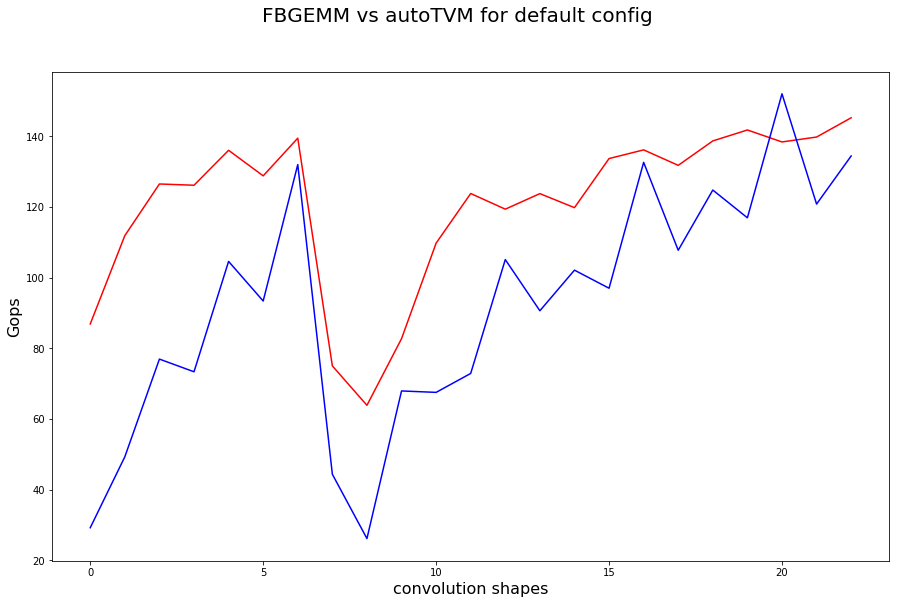

In [266]:
t = np.arange(len(excel_Gops_lst))

fig = plt.figure(figsize=(15, 9))
plt.plot(t, time_lst, 'r', excel_Gops_lst, 'b')
fig.suptitle('FBGEMM vs autoTVM for default config', fontsize=20)
plt.xlabel('convolution shapes', fontsize=16)
plt.ylabel('Gops', fontsize=16)
fig.savefig('test.jpg')

In [157]:
shape_lst = []
fbg_lst = []
autotvm_lst = []
for d in data:
    shape_lst.append(d)
    fbg, autotvm = data[d][0], data[d][1]
    fbg_lst.append(fbg)
    fbg_lst.append(autotvm)

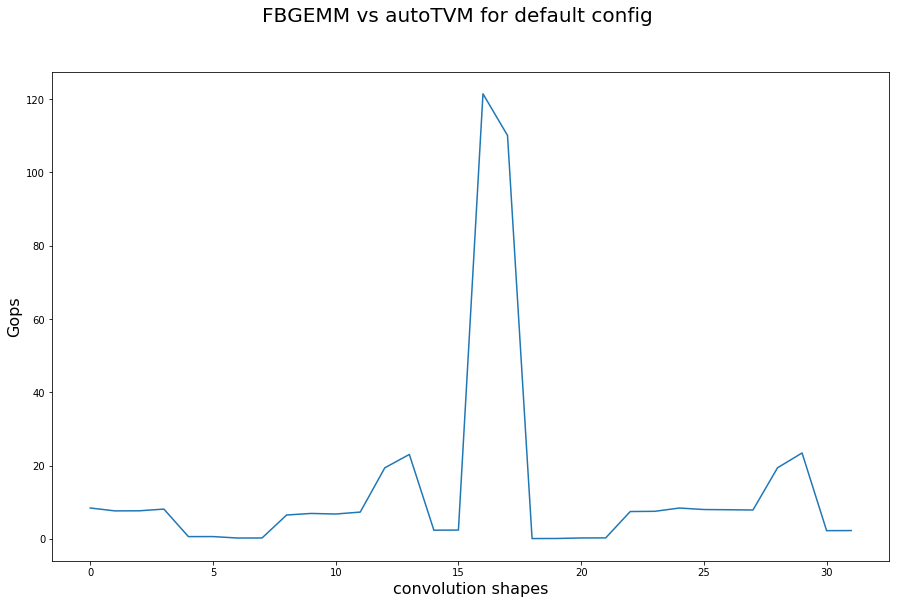

In [158]:
fig = plt.figure(figsize=(15, 9))
plt.plot(fbg_lst)
plt.plot(autotvm_lst)
fig.suptitle('FBGEMM vs autoTVM for default config', fontsize=20)
plt.xlabel('convolution shapes', fontsize=16)
plt.ylabel('Gops', fontsize=16)
fig.savefig('test.jpg')

In [114]:
def good_filepath_df(filepath):
    words = filepath[21:][:-4]
    words = [eval(w) for w in words.split("_")]

    config = words[0], words[1], words[2], [words[3], words[4]], words[5], [words[6], words[7]], [words[8], words[9]], \
             [words[10], words[11], words[12], words[13]]
    MB, IC, OC, IN_DIM, G, K, stride, pad = config[0], config[1], config[2], config[3], \
                                            config[4], config[5], config[6], config[7]

    config_lst = []
    runtime_lst = []
    TOTAL_filepath = "../../../" + filepath
    with open(TOTAL_filepath) as fp:
        for _, line in enumerate(fp):
            line = line.replace("null", "None")
            line = eval(line)
            config = line["i"][5]["e"][0][2]
            runtime = line["r"][0][0]
            config_lst.append(config)
            runtime_lst.append(runtime)


    # clean bad data
    bad_config_lst = []
    new_config_lst = []
    new_runtime_lst = []
    for i in range(len(config_lst)):
        if runtime_lst[i] <= 1:
            new_config_lst.append(config_lst[i])
            new_runtime_lst.append(runtime_lst[i])
        else:
            bad_config_lst.append(config_lst[i])
            
    def_runtime = 0
    for i in range(len(new_config_lst)):
        #[140, 16, 512, 28, 16, 16, 4]
        if new_config_lst[i][0] == 140 and new_config_lst[i][1] == 16 and new_config_lst[i][1] == 512:
            print(new_config_lst[i])
            #def_runtime = new_runtime_lst[i]
    print(def_runtime)
            
    IN_DIMP = [0, 0]
    OUT_DIM = [0, 0]

    IN_DIMP[0] = IN_DIM[0] + pad[0] + pad[2]
    OUT_DIM[0] = (IN_DIMP[0] - K[0]) / stride[0] + 1

    IN_DIMP[1] = IN_DIM[1] + pad[1] + pad[3]
    OUT_DIM[1] = (IN_DIMP[1] - K[1]) / stride[1] + 1

    MDim = MB * OUT_DIM[0] * OUT_DIM[1];
    NDim = OC / G
    KDim = K[0] * K[1] * IC
    no_ops = 2 * MDim * NDim * KDim
    Gops_lst = [no_ops / r / math.pow(10, 9) for r in new_runtime_lst]
    
    dictionary = dict(zip(Gops_lst, new_config_lst))
    pair = sorted(dictionary.items(), key = lambda x : -x[0])

    new_config_x = [p[1] for p in pair]
    new_Gops_lst = [p[0] for p in pair]
    
    new_config_lst = np.array(new_config_x)
    new_config_lst = pd.DataFrame(new_config_lst, columns=["mcb", "ncb", "kcb", "mr", "nr", "16", "4"])
    new_config_lst = new_config_lst.drop(["16", "4"], axis = 1)
    new_config_lst["Gops"] = new_Gops_lst
    
    return new_config_lst, new_Gops_lst[0]


In [104]:
def add_filepath_df(filepath):
    words = filepath[19:][:-4]
    print(words)
    words = [eval(w) for w in words.split("_")]

    config = words[0], words[1], words[2], [words[3], words[4]], words[5], [words[6], words[7]], [words[8], words[9]], \
             [words[10], words[11], words[12], words[13]]
    MB, IC, OC, IN_DIM, G, K, stride, pad = config[0], config[1], config[2], config[3], \
                                            config[4], config[5], config[6], config[7]

    config_lst = []
    runtime_lst = []
    TOTAL_filepath = "../../../" + filepath
    with open(TOTAL_filepath) as fp:
        for _, line in enumerate(fp):
            line = line.replace("null", "None")
            line = eval(line)
            config = line["i"][5]["e"][0][2]
            runtime = line["r"][0][0]
            config_lst.append(config)
            runtime_lst.append(runtime)


    # clean bad data
    bad_config_lst = []
    new_config_lst = []
    new_runtime_lst = []
    for i in range(len(config_lst)):
        if runtime_lst[i] <= 1:
            new_config_lst.append(config_lst[i])
            new_runtime_lst.append(runtime_lst[i])
        else:
            bad_config_lst.append(config_lst[i])
    
        
    IN_DIMP = [0, 0]
    OUT_DIM = [0, 0]

    IN_DIMP[0] = IN_DIM[0] + pad[0] + pad[2]
    OUT_DIM[0] = (IN_DIMP[0] - K[0]) / stride[0] + 1

    IN_DIMP[1] = IN_DIM[1] + pad[1] + pad[3]
    OUT_DIM[1] = (IN_DIMP[1] - K[1]) / stride[1] + 1

    MDim = MB * OUT_DIM[0] * OUT_DIM[1];
    NDim = OC / G
    KDim = K[0] * K[1] * IC
    no_ops = 2 * MDim * NDim * KDim
    Gops_lst = [no_ops / r / math.pow(10, 9) for r in new_runtime_lst]
    
    dictionary = dict(zip(Gops_lst, new_config_lst))
    pair = sorted(dictionary.items(), key = lambda x : -x[0])

    new_config_x = [p[1] for p in pair]
    new_Gops_lst = [p[0] for p in pair]
    
    new_config_lst = np.array(new_config_x)
    new_config_lst = pd.DataFrame(new_config_lst, columns=["mcb", "ncb", "kcb", "mr", "nr", "16", "4"])
    new_config_lst = new_config_lst.drop(["16", "4"], axis = 1)
    new_config_lst["Gops"] = new_Gops_lst
    
    return new_config_lst, new_Gops_lst[0]


In [116]:
best_Gops_lst = []
for filepath in good_filepaths:
    _, best_Gops = good_filepath_df(filepath)
    print(_.shape)
    best_Gops_lst.append(best_Gops)

0
(300, 6)
0
(300, 6)
0
(150, 6)
0
(150, 6)
0
(150, 6)
0
(299, 6)
0
(149, 6)
0
(150, 6)
0
(150, 6)


In [96]:
best_Gops_lst

[0.30453783178712746,
 7.491227990950267,
 7.851584836219937,
 20.451044374309213,
 137.7049108001278,
 0.18058848016888365,
 0.3144331222189877,
 8.183895669982364,
 8.733575101982439]

In [105]:
default_Gops_lst = []
for filepath in add_filepaths:
    _, def_Gops = add_filepath_df(filepath)
    default_Gops_lst.append(def_Gops)

1_32_16_12_14_4_3_3_1_1_0_0_0_0
[[140, 16, 512, 28, 16, 16, 4], [140, 16, 512, 28, 16, 16, 4]]
1_32_32_14_14_1_3_3_1_1_0_0_0_0
[[140, 16, 512, 28, 16, 16, 4], [140, 16, 512, 28, 16, 16, 4]]
1_32_32_14_14_1_3_3_1_1_1_1_1_1
[[140, 16, 512, 28, 16, 16, 4]]
1_3_64_224_224_1_7_7_2_2_3_3_3_3
[[140, 16, 512, 28, 16, 16, 4]]
1_544_544_14_14_1_3_3_2_2_1_1_1_1
[[140, 16, 512, 28, 16, 16, 4]]
1_8_8_4_4_1_3_3_1_1_1_1_0_0
[[140, 16, 512, 28, 16, 16, 4], [140, 16, 512, 28, 16, 16, 4]]
2_32_16_16_14_4_3_3_1_1_0_0_0_0
[[140, 16, 512, 28, 16, 16, 4]]
2_32_32_14_14_1_3_3_1_1_0_0_0_0
[[140, 16, 512, 28, 16, 16, 4]]
2_32_32_28_14_1_3_3_1_1_1_1_0_0
[[140, 16, 512, 28, 16, 16, 4]]


In [100]:
default_Gops_lst

[0.29440612391997584,
 6.959369017712487,
 7.403108932304276,
 20.069009785500516,
 132.32248359025212,
 0.1305719449149607,
 0.3103272240841287,
 7.848519476863543,
 8.584755128820449]

In [117]:
percent = []
for i in range(len(default_Gops_lst)):
    p = best_Gops_lst[i] / default_Gops_lst[i]
    percent.append(p)
    

In [118]:
percent

[1.034414052711436,
 1.0764234475689003,
 1.0605794008998959,
 1.0190360457686711,
 1.040676588466574,
 1.3830572891174888,
 1.0132308666987784,
 1.0427311410906819,
 1.0173353777631207]

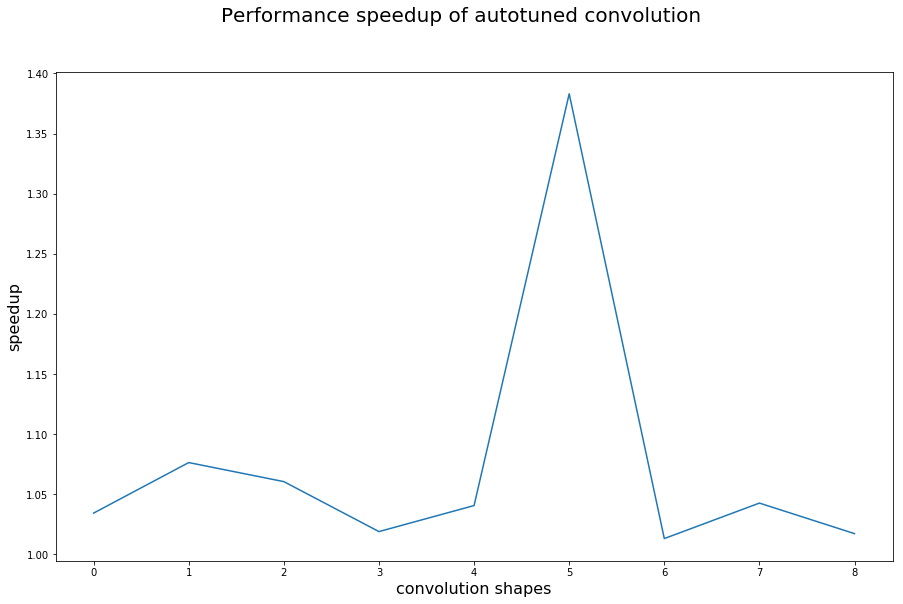

In [131]:
fig = plt.figure(figsize=(15, 9))
plt.plot(percent)
fig.suptitle('Performance speedup of autotuned convolution', fontsize=20)
plt.xlabel('convolution shapes', fontsize=16)
plt.ylabel('speedup', fontsize=16)
fig.savefig('test.jpg')

In [53]:
df = new_config_lst
mcb_max = df['mcb'].max()
mcb_min = df['mcb'].min()

ncb_max = df['ncb'].max()
ncb_min = df['ncb'].min()

kcb_max = df['kcb'].max()
kcb_min = df['kcb'].min()

mr_max = df['mr'].max()
mr_min = df['mr'].min()

nr_max = df['nr'].max()
nr_min = df['nr'].min()

Gops_max = df['Gops'].max()
Gops_min = df['Gops'].min()

data = [
    go.Parcoords(
        line = dict(color = df['Gops'],
                   colorscale = 'Jet',
                   showscale = True,
                   reversescale = False,
                   cmin = Gops_min,
                   cmax = Gops_max),
        dimensions = list([
            dict(range = [mcb_min,mcb_max],
                 label = 'MCB', values = df['mcb']),
            dict(range = [ncb_min,ncb_max],
                 label = 'NCB', values = df['ncb']),
            dict(range = [kcb_min,kcb_max],
                 label = 'KCB', values = df['kcb']),
            dict(range = [mr_min,mr_max],
                 label = 'MR', values = df['mr']),
            dict(range = [nr_min,nr_max],
                 label = 'NR', values = df['nr'])
        ])
    )
]

layout = go.Layout(title="MB={}, IC={}, OC={}, IN_DIM={}, G={}, K={}, stride={}, pad={}".format(MB, IC, OC, IN_DIM, G, K, stride, pad))

py.offline.plot({"data": data, "layout": layout},
                filename = "MB={}, IC={}, OC={}, IN_DIM={}, G={}, K={}, stride={}, pad={}".format(MB, IC, OC, IN_DIM, G, K, stride, pad), auto_open=True)

/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:524: UserWarning:

Your filename `MB=1, IC=544, OC=544, IN_DIM=[14, 14], G=1, K=[3, 3], stride=[2, 2], pad=[1, 1, 1, 1]` didn't end with .html. Adding .html to the end of your file.



'MB=1, IC=544, OC=544, IN_DIM=[14, 14], G=1, K=[3, 3], stride=[2, 2], pad=[1, 1, 1, 1].html'